# NumPy & KNN - Por [Dora](github.com/joaopedromattos) (Telegram : @joaopedromattos)

Sejam muito bem-vindos a mais uma aula do Curso de Introdução à Ciência de Dados do Data! Neste Jupyter notebook, nos aprofundaremos nos conceitos da biblioteca _NumPy_ e utilizaremos o modelo KNN (K-Nearest Neighbors) visto na aula 1 para ilustrarmos a utilidade dessa excelente _library_, com foco em **operações matemáticas** e **desempenho**.

In [3]:
import numpy as np
import os
import pickle
import random
import time
import platform
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Sumário da aula
- Numpy - Parte 1
    - Conceitos básicos
    - Operações matemáticas e tipos de dados
    - Exemplos
  
- KNN
    - Implementação "naive"
    - Implementação single-loop
    - Implementação vetorizada

## _[NumPy](https://numpy.org/) - "A library to rule 'em all"_ - Parte 1

De acordo com a documentação oficial, a biblioteca _Numpy_ se trata de:

>NumPy é um pacote fundamental para computação científica para Python. Ele contém entre  outras coisas:
> - um poderoso objeto em forma de array N-dimensional
> - sofisticadas funções de broadcasting (que veremos adiante)
> - ferramentas de integração de código C/C++ e Fortran
> - funções de álgebra linear, transformadas de Fourier e números aleatórios
> Além de seus óbvios usos científicos, NumPy também pode ser utilizado como um eficiente container multi-dimensional para dados genéricos. Tipos de dados arbitrários podem ser definidos. Isso permite uma integração modularizada e rápida com uma grande variedade de bancos de dados.



A partir da descrição acima, percebemos que essa biblioteca é **<span style="color:#F17FBD">extremamente</span>** útil para aplicações em Ciência de Dados e Machine Learning.

_**Dica**: você pode usar os operadores ```?``` ou ```??``` para ver detalhes sobre uma função desconhecida. Também existe o método help(), que serve para o mesmo propósito. Teste nas células abaixo!_

In [10]:
help(np.abs)

Help on ufunc object:

absolute = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate ar

In [11]:
np.abs?
# np.abs??

### Arrays

Utilizaremos a _library_ **_Numpy_** em **_Python_** principalmente para realizar operações com Arrays (vetores). Como a **_Numpy_** é implementada em **C** (chamamos esse conceito de ```bindings```), suas operações sejam **MUITO** mais rápidas do que se você simplesmente implementasse essas mesmas operações em **_Python_**. **<span style="color:#F17FBD">Por isso, enquanto estiver programando seus modelos, certifique-se de tentar utilizar o máximo possível de funções NumPy para acelerar a execução do seu código</span>**. Nesta aula, não cobriremos tudo o que a biblioteca pode oferecer, mas em caso de dúvidas, você pode consultar a [documentação oficial do NumPy](https://numpy.org/).

### Alguns exemplos básicos

#### Instanciando arrays e seus formatos

Existem várias formas de instanciar arrays a partir da biblioteca NumPy para facilitar sua vida, confira no exemplo abaixo. _<span style="color:red">*Obs:*</span> Um array NumPy ocupa, em geral, menos espaço em memória por ter tipagem estática, o que é mais um motivo para tentar usá-los na maior parte do seu código se possível_.

In [ ]:
a = np.array([1, 2, 3]) # Instanciando um array 1D em NumPy

# Atributo '.shape' dos arrays NumPy retorna o formato do array
print("Formato do array 1D: ", a.shape)


b = np.array([[1,2,3],[4,5,6]]) # Array em 2D em NumPy
print("Formato do array 2D: ", b.shape, '\n')

# Voce pode querer simplesmente instanciar varios outros tipos de array:
# Arrays inicializados com 0's
zeros = np.zeros(shape=(2, 2)) # Matriz 2x2 inincializada com 0's
print(zeros, '\n')

# Arrays inicializados com 1's
ones = np.ones(shape=(2, 2)) # Matriz 2x2 inicializada com 1's
print(ones, '\n')

# Inicializados com um valor personalizado
cincos = np.full(shape=(2, 2), fill_value=5) # Matriz 2x2 preenchida com 5's
print(cincos, '\n')

# Matriz identidade N-dimensional
ident = np.eye(2) # Matriz identidade de ordem 2
print(ident, '\n')

# Matriz aleatoria
rand = np.random.random((2, 2)) # Matriz 2x2
print(rand, '\n')

#### Matematica com NumPy Arrays e _Operator Overloading (Sobrecarga de operadores)_

A NumPy facilita operações de Álgebra Linear sobrecarregando os operadores da linguagem _Python_ , de modo que eles interajam com seus arrays da forma mais intuitiva matematicamente falando. Confira no exemplo:

In [27]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Soma entre matrizes, elemento a elemento
print("+")
print(x + y)
print()
print(np.add(x, y), "\n")

# Diferenca entre matrizes, elemento a elemento
print("-")
print(x - y)
print()
print(np.subtract(x, y), "\n")

# Multiplicacao elemento a elemento
print("*")
print(x * y)
print()
print(np.multiply(x, y), "\n")

# Multiplicacao de matrizes
print("Dot")
print(x * y)
print()
print(np.dot(x, y), "\n")

# Multiplicacao de Matrizes Broadcasting
print("@")
print()
print(x @ y, "\n")

# Divisao elemento a elemento
print("/")
print(x / y)
print()
print(np.divide(x, y), "\n")

# Raiz quadrada elemento a elemento
print("Sqrt")
print(np.sqrt(x), "\n")

+
[[ 6.  8.]
 [10. 12.]]

[[ 6.  8.]
 [10. 12.]] 

-
[[-4. -4.]
 [-4. -4.]]

[[-4. -4.]
 [-4. -4.]] 

*
[[ 5. 12.]
 [21. 32.]]

[[ 5. 12.]
 [21. 32.]] 

Dot
[[ 5. 12.]
 [21. 32.]]

[[19. 22.]
 [43. 50.]] 

@

[[19. 22.]
 [43. 50.]] 

/
[[0.2        0.33333333]
 [0.42857143 0.5       ]]

[[0.2        0.33333333]
 [0.42857143 0.5       ]] 

Sqrt
[[1.         1.41421356]
 [1.73205081 2.        ]] 



<span style="color:red">**Importante**: A multiplicação de matrizes N-D, sendo N>2 dá resultados diferentes quando você usa ```np.dot``` e ```@```! Veja mais em [matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html), [dot](https://numpy.org/devdocs/reference/generated/numpy.dot.html), [diferença entre as duas operações](https://stackoverflow.com/questions/34142485/difference-between-numpy-dot-and-python-3-5-matrix-multiplication).</span>

**Lembrando**: Mesmo que você implementasse todas essas sobrecargas de operador vistas acima, da forma mais eficiente possível em Python, <span style="color:red">elas ainda seriam mais lentas do que se você utilizasse NumPy!</span>

#### Brincando com índices

De certa forma, acessar elementos nos arrays do NumPy é muito semelhante a acessar elementos nas listas nativas do _Python_.

In [21]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Indices inteiros (Igual ao do Python normal)
print("Arrays com indices inteiros")
print(a[1, 3]) # Exibe '8'
print(a[1][3]) # Mesmo com uma notacao diferente, tambem exibe '8'
print(a[2]) # Exibe "[9, 10, 11, 12]"

# Indices vetorizados
#(retornam um vetor com os elementos presentes
# nos arrays passados como indices)
print("Arrays com indices vetorizados")
print(a[[2, 1], [1, 3]]) # Exibe um array com os elementos (2, 1) e (1, 3) da matriz 'a'

# Slicing
print("Arrays com slices")
print("Segunda linha da matriz:", a[1, :]) # Exibe a segunda linha da matriz
print("Segunda coluna da matriz:", a[:, 1]) # Exibe a segunda coluna da matriz

# Exibe a sub-matriz com as 2 primeiras linhas da matriz e as 3 primeiras colunas
print("Submatriz das 2 primeiras linhas e 3 primeiras colunas:\n", a[0:2, 0:3]) 

# Indices booleanos
print("Arrays com indices booleanos")
print(a > 2) # Retorna uma matriz do formato original com valores booleanos dentro
print(a[ a > 2 ]) # Retorna um vetor com os elementos da matriz que cumprem a sentenca booleana


Arrays com indices inteiros
8
[ 9 10 11 12]
Arrays com indices vetorizados
[10  8]
Arrays com slices
Segunda linha da matriz: [5 6 7 8]
Segunda coluna da matriz: [ 2  6 10]
Submatriz das 2 primeiras linhas e 3 primeiras colunas:
 [[1 2 3]
 [5 6 7]]
Arrays com indices booleanos
[[False False  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[ 3  4  5  6  7  8  9 10 11 12]


#### Tipos de dados

Os elementos dos NumPy arrays **são todos do mesmo tipo, diferentemente das listas nativas do Python**. Quando você inicializa o array, a biblioteca tenta inferir o tipo de dado que será utilizado dentro do seu array, mas você também pode definir isso manualmente.

In [ ]:
integerArray = np.array([1, 3, 4, 5, 8])
print(integerArray.dtype) # Exibe "int64"

floatArray = np.array([1.0, 2.0])
print(floatArray.dtype) # Prints "float64"

forcedArray = np.array([1, 2], dtype=np.int64) # Forçando um tipo particular de dado
print(forcedArray.dtype) # Prints "int64"

#### Transposição de vetores e _Broadcast Operations_

**_Broadcast Operation_** que permite realizarmos uma operação com outro array de tamanho diferente. **No exemplo abaixo**, queremos somar o vetor ```v``` em cada uma das linhas da matriz  ```x``` sem utilizar nenhum ```for```; conseguimos fazer isso simplesmente fazendo uma operação de soma como se ```v``` fosse uma matriz de vetores empilhada. Veja no exemplo

In [ ]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

# Em Python, nem sempre temos o controle de quando copiamos
# e de quando simplesmente fazemos referencia a outra variavel.
# Entao usaremos np.copy() sempre que realmente quisermos ter
# certeza de que vamos copiar o conteudo de uma variavel
x_broadcast = np.copy(x)
v = np.array([1, 0, 1])
y = np.copy(x) # Cria uma matriz exatamente igual a x


# Sem Broadcast
for i in range(4):
    x[i, :] = x[i, :] + v
    
# Com Broadcast
x_broadcast = x_broadcast + v
# Resumindo: O Broadcast tratou v como se fosse 4 vetores v
# empilhados e conseguiu realizar a operacao normalmente.


# Verificando se são iguais
print(x_broadcast == x)


# Usamos y.T para transpor a matriz y, de forma
# que seja possivel multiplica-la pela matriz x.
print("\nMultiplicacao de x por y transposta: \n", np.dot(x, y.T))

##### Obs: [Link da documentação com todas as subrotinas matemáticas](http://docs.scipy.org/doc/numpy/reference/routines.math.html)

### Comparação de velocidade entre Python puro vs NumPy arrays

Ao rodar o código abaixo, você terá uma dimensão do quão mais rápido é utilizar os NumPy arrays dentro do seu código. Você verá outros exemplos quando criarmos nosso modelo de KNN.

**Criação de dois vetores e soma de dois vetores**

In [13]:
size_of_vec = 1_000_000

def pure_python():
    """
    Funcao que utiliza Python e List Comprehension, sem numpy.
    
    Esta simples funcao eh simplesmente muito lenta se comparada a versao
    que utiliza NumPy devido aos bindings em C que a biblioteca apresenta.
    """
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - t1


def numpy_version():
    """
    Funcao que utiliza Numpy para realizar a soma de vetores
    
    Repare na linha em que realizamos a soma dos vetores X e Y.
    Podemos simplesmente somar as duas variaveis como se fossem escalares
    e o NumPy se encarrega de realizar a soma elemento-a-elemento dos dois
    vetores! Isso eh uma propriedade do operator overloading da biblioteca NumPy,
    que tenta deixar as operacoes o mais semelhante as da Algebra Linear o possivel!
    """
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y # Realizando a soma de valores com operator overloading.
    return time.time() - t1


t1 = pure_python()
t2 = numpy_version()
print("Tempo Python: ", t1, "Tempo NumPy:", t2)
print("Neste exemplo, NumPy é ", t1/t2, " vezes mais rápido!")

Tempo Python:  0.19046449661254883 Tempo NumPy: 0.005743980407714844
Neste exemplo, NumPy é  33.15897393325585  vezes mais rápido!


**Criação de vetores aleatórios e operações sobre esses vetores**

O módulo ```np.random``` possui geradores de números aleatórios em diversas distribuições estatísticas diferentes, junto de subrotinas para Análise Combinatória. Na célula abaixo realizamos a geração de um vetor de números inteiros aleatórios chamando o método ```np.random.randint(high=SIZE, size=SIZE)```, em que o parâmetro ```high``` indica o limite superior (não incluso) do intervalo em que os números serão gerados ($[0, 10000000)$, neste caso) e o parâmetro ```size``` recebe uma tupla ou um número inteiro indicando o formato do vetor.

In [5]:
SIZE = 10000000 # Array size
M = 10000       # Matrix dimensions
N = 1000

numpyTime = 0
pythonTime = 0

print("===========Using Numpy============")

# Criacao de array aleatorio
start = time.time()
arr = np.random.randint(high=SIZE, size=SIZE)
numpyTime += time.time() - start
print('Array creation: ', numpyTime)

# Adicao de um escalar ao array aleatorio
start = time.time()
arr += 5
numpyTime += time.time() - start
print('Scalar addition: ', numpyTime)

# Multiplicacao do array aleatorio por outro
arr2 = np.random.randint(SIZE, size=SIZE)
start = time.time()
arr *= arr2
numpyTime += time.time() - start
print('Array multi Array: ', numpyTime)

# Mudanca de formato do array
start = time.time()
arr.reshape(M, N)
numpyTime += time.time() - start
print('Make matrix: ', numpyTime)


print()
print("===========Using Python============")

# Criacao de array aleatorio
start = time.time()
arr = [random.randint(0, SIZE) for x in range(SIZE)]
pythonTime += time.time() - start
print('Array creation: ', pythonTime)

# Adicao de um escalar ao array aleatorio
start = time.time()
arr = [x+5 for x in arr]
pythonTime += time.time() - start
print('Scalar addition: ', pythonTime)

# Multiplicacao do array aleatorio por outro
arr2 = [random.randint(0, SIZE) for x in range(SIZE)]
start = time.time()
arr = [x*y for x,y in zip(arr, arr2)]
pythonTime += time.time() - start
print('Array multi Array: ', pythonTime)

# Mudanca de formato do array
start = time.time()
matrix = [ [arr[lin*col+col] for col in range(M)] for lin in range(N)]
pythonTime += time.time() - start
print('Make matrix: ', pythonTime)

print()
print("===========Final results============")
print("NumPy final time: ", numpyTime)
print("Pure python final time: ", pythonTime)
print("Neste exemplo, NumPy é ", pythonTime/numpyTime, " vezes mais rápido!")

===========Using Numpy============
Array creation:  0.23953890800476074
Scalar addition:  0.24703669548034668
Array multi Array:  0.25835108757019043
Make matrix:  0.25840210914611816

===========Using Python============
Array creation:  7.258998394012451
Scalar addition:  7.881652355194092
Array multi Array:  8.56698751449585
Make matrix:  11.43625283241272

===========Final results============
NumPy final time:  0.25840210914611816
Pure python final time:  11.43625283241272
Neste exemplo, NumPy é  44.25758315287544  vezes mais rápido!


**Implementação não otimizada do Mergesort vs Ordenação nativa vs Ordenação NumPy**

In [ ]:
SIZE = 3000000

def merge_sort(array):
    if len(array)>1:
        half    = len(array) // 2
        l_part  = array[:half]
        r_part  = array[half:]

        merge_sort(l_part)
        merge_sort(r_part)

        l_index, r_index, index = 0, 0, 0

        while l_index < len(l_part) and r_index < len(r_part):
            if l_part[l_index] < r_part[r_index]:
                array[index] = l_part[l_index]
                l_index+=1
            else:
                array[index] = r_part[r_index]
                r_index+=1
            index+=1
        
        while l_index < len(l_part):
            array[index] = l_part[l_index]
            index+=1
            l_index+=1
        
        while r_index < len(r_part):
            array[index] = r_part[r_index]
            index+=1
            r_index+=1


nativeMerge = [random.randint(0, SIZE) for x in range(SIZE)]
numpySort = np.copy(nativeMerge)
nonOptMerge = np.copy(nativeMerge)
    
    
start = time.time()
nativeMerge.sort()
timeNative = time.time() - start
print("Ordenacao nativa: ", timeNative)
    
    
start = time.time()
merge_sort(nonOptMerge)
timeNonOpt = time.time() - start
print("Ordenacao Mergesort mal-otimizada: ", timeNonOpt)
    
start = time.time()
np.sort(numpySort)
timeNumpy = time.time() - start
print("Ordenacao NumPy : ", timeNumpy)

_<span style="color:red">OBS</span>.: No caso do último exemplo, repare como o Mergesort foi implementado usando NumPy e mesmo assim ele foi MUITO mais lento do que as outras duas implementações. Isso se deve às trocas de contexto entre a biblioteca NumPy e os tipos de dados do Python! (Lembrando que tanto a implementação nativa do Python quando a do NumPy são bindings em C)_

**Agradecimentos especiais ao [Ygor Pontelo](https://github.com/ygorpontelo) por ter nos cedido os dois últimos exemplos.**

## KNN - Parte 2

> **OBS.:** O conteúdo dessa segunda parte é retirado, majoritariamente, de uma das aulas do curso [CS231n](http://cs231n.github.io/) de Stanford. Aqui ficam nossos agradecimentos e créditos aos TAs e professores do curso.

**Relembrando o KNN**: A ideia é muito simples: encontraremos as k k imagens mais próximas e pediremos que votem no rótulo da imagem de teste. Em particular, quando k = 1, recuperamos o classificador Vizinho Mais Próximo[$^1$](http://cs231n.github.io/classification/).

![Imagem](./imgs/KNNDecisionBoundary.png)

**<span style="color:#B169B8" >Tradução da legenda</span>**: Um exemplo da diferença entre o vizinho mais próximo e um classificador de 5 vizinhos mais próximos, usando pontos bidimensionais e 3 classes (vermelho, azul, verde). As regiões coloridas mostram os limites de decisão induzidos pelo classificador com uma distância L2. As regiões brancas mostram pontos ambiguamente classificados (ou seja, os votos da classe estão empatados em pelo menos duas classes). Observe que, no caso de um classificador NN, pontos de dados mais externos (por exemplo, ponto verde no meio de uma nuvem de pontos azuis) criam pequenas ilhas de prováveis ​​previsões incorretas, enquanto o classificador 5-NN suaviza essas irregularidades, provavelmente levando a uma melhor generalização nos dados de teste (não mostrados).

### O problema

Nesta aula, ainda trabalharemos com um problema de classificação de imagens, mas será bem mais difícil do que o que foi apresentado na tarefa #1. Utilizaremos o [dataset Cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html), que é bem maior em número de instâncias e possui imagens de dimensionalidade maior (32x32x3).

<br>

No caso do kNN implementado aqui, tentaremos manter as similaridades com o que foi implementado no assignment #1, já que nosso foco é abordar **o ganho de desempenho a partir do uso do NumPy na implementação de seus modelos!** Nesse sentido, ainda utilizaremos a **L2** para calcular a distância entre as instâncias de treino:
<br>
<div align="center">$L2= \sqrt{\sum_{i}^{N_{test}}\sum_{j}^{N_{train}} (x_i - x_j)^2}$</div>
<br>
**Dica**: A estrutura das funções que utilizaremos em nossa implementação é absolutamente similar à do assignment #1, de forma que você consiga ler o código de maneira muito mais ágil!

#### Obtenção do dataset

<span style="color:red">Caso você esteja no Windows, basta [baixar manualmente o dataset](http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz), descompactar o arquivo mesma pasta deste _Jupyter Notebook_ e **não** executar a próxima célula</span>

In [ ]:
# Usaremos um dataset de imagens chamado CIFAR-10
# ATENÇÃO: Trata-se de um dataset bem maior do que utilizado no primeiro assignment

# Em caso de Windows, comente as proximas 3 linhas.
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz 

In [2]:
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [3]:
X_train, y_train, X_test, y_test = load_CIFAR10("./cifar-10-batches-py")

**Visualização do Dataset:**

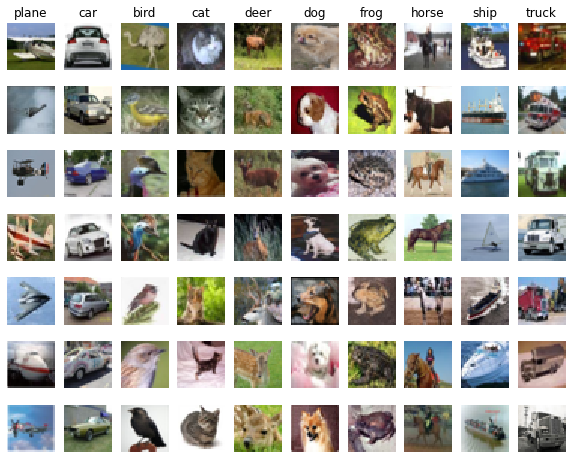

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
# Utilizaremos apenas os primeiros 5000 exemplos
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


### As 3 implementações

- kNN Naive
    - A versão implementada no assignment #1, que se utiliza de dois loops do tipo ```for```. A função correspondente é a ```compute_distances_two_loops```.
- kNN Single-for
    - Versão melhorada do assignment #1, que possibilita o uso de apenas um loop do tipo ```for```. Implementaremos essa versão dentro da ```compute_distances_one_loop```.
- Vectorized kNN
    - Versão otimizada do modelo, que funciona **sem o uso de nenhum laço de repetição**. Correspondente a ```compute_distances_no_loops```.

In [51]:
def predict_labels(dists, y_train, k=1):
    """
    Esta funcao foi abordada durante o assignment.
    Ela eh responsavel por realizar a 'votacao'
    entre os k vizinhos mais proximos. 
    
    Parametros:
        dists => Vetor de distancias computado entre
        as instancias de teste e treino.
        
        k => O hiperparametro k.
    """
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in range(num_test):
        closest_y = []
        closest_y = y_train[np.argsort(dists[i])][0:k]
        y_pred[i] = np.bincount(closest_y).argmax()

    return y_pred

#### kNN Naive

Passaremos mais rápido por essa versão, pois ela foi abordada de forma similar no assignment #1:

In [30]:
def compute_distances_two_loops(X_train, X):
    """
    Computa a distancia entre cada ponto de teste em X e cada ponto de
        treino em X_train usando loops aninhados para os dados de treino e
        teste.

        Inputs:
        - X: Array numpy (num_test, D) com os dados de teste
        - X_train: Array numpy (num_train, D) com os dados do treino

        Returns:
        - dists: Array numpy (num_test, num_train) onde a dists[i, j] e a 
        distancia Euclidiana entre o i-esimo ponto de teste e o j-esimo ponto
        de treino.
    """
    num_test = X.shape[0]
    num_train = X_train.shape[0]
    
    dists = np.zeros((num_test, num_train))
    
    for i in range(num_test):
        for j in range(num_train):
            
            # Na versao implementada por voces,
            # nao era permitido que se utilizasse essa funcao.
            dists[i][j] = np.linalg.norm(X_train[j] - X[i])
            
            # Entao a solucao alternativa seria essa linha:
            # dists[i][j] = np.sqrt(np.sum((X[i] - self.X_train[j])**2))
            
    return dists


#### Avaliação do kNN Naive

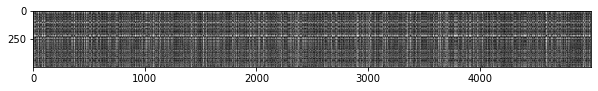

0.278
CPU times: user 21.7 s, sys: 7.6 ms, total: 21.7 s
Wall time: 21.8 s


In [61]:
%%time
dists = compute_distances_two_loops(X_train, X_test)
y_test_pred = predict_labels(dists, y_train, k=5)


plt.imshow(dists, interpolation='none')
plt.show()
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print(accuracy)

Existem duas coisas que podem ser ditas acerca do que implementamos:
- O kNN demora MUITO para ser executado;
- Ele tem uma precisão muito ruim para imagens ligeiramente maiores do que 8x8. Pense na "Curse of Dimensionallity" :)

#### kNN Single-for

Como vimos na parte de _NumPy_ , podemos usar _Broadcasting_ para realizar operações entre vetores de dimensões diferentes. É esse o conceito que utilizaremos aqui. Imagine que este vetor seja uma instância de teste:<br>
<div align="center">
$X_{teste} = \begin{bmatrix}
X_0 & . & . & . & X_n
\end{bmatrix}$
</div>

<br>

Queremos realizar uma mesma operação com todas as linhas da matriz de instâncias de teste, então podemos realizar a operação como se estivéssemos "empilhando" vários vetores $X_{teste}$, um para cada linha da matriz de instâncias de treino. Veja na função abaixo:




In [90]:
def compute_distances_single_loop(X_train, X):
    """
    Computa a distancia entre cada ponto de teste em X e cada ponto de
        treino em X_train usando loops aninhados para os dados de treino e
        teste.

        Inputs:
        - X: Array numpy (num_test, D) com os dados de teste
        - X_train: Array numpy (num_train, D) com os dados do treino

        Returns:
        - dists: Array numpy (num_test, num_train) onde a dists[i, j] e a 
        distancia Euclidiana entre o i-esimo ponto de teste e o j-esimo ponto
        de treino.
    """
    num_test = X.shape[0]
    num_train = X_train.shape[0]

    dists = np.zeros((num_test, num_train))

    for i in range(num_test):

        # O Broadcasting permite que facamos operacoes usando o
        # vetor X[i] e a matriz X_train...
        dists[i, :] = np.linalg.norm((X_train - X[i]), axis=-1)


    return dists

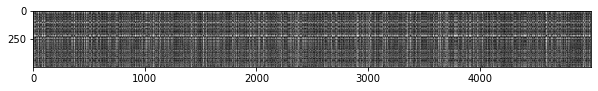

0.278
CPU times: user 16.9 s, sys: 10.9 s, total: 27.8 s
Wall time: 27.9 s


In [91]:
%%time
dists = compute_distances_single_loop(X_train, X_test)
y_test_pred = predict_labels(dists, y_train, k=5)


plt.imshow(dists, interpolation='none')
plt.show()
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print(accuracy)

#### Vectorized kNN

Se antes o grande truque por trás da última implementação era uma única propriedade computacional, agora nos basearemos em uma equivalência matemática para acelerar ainda mais nosso modelo.

<p>Temos que a norma L2 pode ser escrita de duas formas, mas uma delas é computacionalmente mais eficiente:</p>
<div align="center">$L2= \sqrt{\sum_{i}^{N_{test}}\sum_{j}^{N_{train}} (x_i - x_j)^2} = \sqrt{\sum_{i}^{N_{test}}\sum_{j}^{N_{train}} (x_i^2 - 2x_jx_i + x_j^2)}$</div>

Na segunda maneira de calcular a norma L2 podemos nos aproveitar de todas as operações de _Broadcasting_ do _NumPy_ para eliminar de uma vez o ```for``` que itera pelos dados do teste. Veja a implementação:

In [83]:
def compute_distances_no_loops(X_train, X):
    """
    Computa a distancia entre cada ponto de teste em X e cada ponto de
        treino em X_train usando loops aninhados para os dados de treino e
        teste.

        Inputs:
        - X: Array numpy (num_test, D) com os dados de teste
        - X_train: Array numpy (num_train, D) com os dados do treino

        Returns:
        - dists: Array numpy (num_test, num_train) onde a dists[i, j] e a 
        distancia Euclidiana entre o i-esimo ponto de teste e o j-esimo ponto
        de treino.
    """
    num_test = X.shape[0]
    num_train = X_train.shape[0]

    dists = np.zeros((num_test, num_train))

    # Linha que implementa a raiz quadrada da soma desenvolvida da distancia L2       
    dists = np.sqrt(np.sum(X**2, axis=1).reshape(num_test, 1) + np.sum(X_train**2, axis=1) - 2 * X.dot(X_train.T))        



    return dists

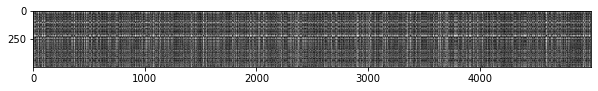

0.278
CPU times: user 1.39 s, sys: 332 ms, total: 1.72 s
Wall time: 705 ms


In [87]:
%%time
dists = compute_distances_no_loops(X_train, X_test)
y_test_pred = predict_labels(dists, y_train, k=5)


plt.imshow(dists, interpolation='none')
plt.show()
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print(accuracy)

Como você pode ver, a diferença no tempo de processamento entre as implementações foi **gritante**. Enquanto as implementações com um e dois loops ```for``` chegam à incrivel marca de 20 segundos de tempo de computacional, a implementação completamente vetorizada executa em menos de 1 segundo. Isso ilustra o quão otimizado seu código pode se tornar a partir do uso das funções implementadas em NumPy. Esperamos que, a partir de agora, você sempre pense duas vezes antes de implementar subrotinas em Python, uma vez que elas já podem estar disponíveis a partir de bibliotecas open-source como o NumPy.

Com isso, encerramos o conteúdo dessa aula. Você aprendeu os conceitos fundamentais da utilização do NumPy e entendeu como eles podem ser utilizados na prática para implementar modelos como o próprio kNN visto em sala de aula. Obrigado e até a próxima.

# Telegram para dúvidas: @joaopedromattos